<a href="https://colab.research.google.com/github/sksos7/Project/blob/main/Codestates_AI_05/Project_S_01/Project_S1_kyu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal of project : "다음 분기에 어떤 게임을 설계해야 할까?"

게임 회사의 데이터 팀

데이터셋을 읽는 것 부터, 이러한 게임을 만들어야 한다는 결론까지 의 과정

해당 내용을 기반으로 설명하는 영상을 작성

발표를 듣는 사람은 비데이터 직군이라 가정

Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization

Sprint 2 : Hypothesis Test, CI, Bayesian

Sprint 3 : DR, PCA, Cluster

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
"""
Name : 게임의 이름입니다.
Platform : 게임이 지원되는 플랫폼의 이름입니다.
Year : 게임이 출시된 연도입니다.
Genre : 게임의 장르입니다.
Publisher : 게임을 제작한 회사입니다.
NA_Sales : 북미지역에서의 출고량입니다.
EU_Sales : 유럽지역에서의 출고량입니다.
JP_Sales : 일본지역에서의 출고량입니다.
Other_Sales : 기타지역에서의 출고량입니다.
"""
# 데이터셋 불러오기
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

# (16598, 10)
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
# 결측치 확인
df.isna().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
# 결측치의 모든 값을 'Unknown' 으로 대체
df = df.fillna('Unknown')

In [5]:
# 출고량을 변환하는 함수
def change_shipment_volume(df,colums):
    count = 0
    for i in df[colums]:
        if 'K' in i:
            tmp = float(i.replace('K',''))
            if tmp != 0:
                df.loc[count,colums] = tmp ** -3
            else : df.loc[count,colums] = tmp
        elif 'M' in i:
            tmp = float(i.replace('M',''))
            df.loc[count,colums] = tmp * 1
        count = count + 1
    return df[colums]

In [6]:
# 모든 출고량 'M' 지우고 x1, 'K' 지우고 **-3
df['NA_Sales'] = pd.to_numeric(change_shipment_volume(df,'NA_Sales'))
df['EU_Sales'] = pd.to_numeric(change_shipment_volume(df,'EU_Sales'))
df['JP_Sales'] = pd.to_numeric(change_shipment_volume(df,'JP_Sales'))
df['Other_Sales'] = pd.to_numeric(change_shipment_volume(df,'Other_Sales'))

In [7]:
# 날짜를 적절하게 바꿈
count = 0
for i in df['Year']:
    if i == 'Unknown':
        count = count + 1
        continue
    elif i < 25:
        df.loc[count,'Year'] = i + 2000
    elif (i > 25) and (i < 100):
        df.loc[count,'Year'] = i + 1900
    count = count + 1

In [8]:
# 가장 최근에 출시된 연도는 2020년
df[df['Year']==2020]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,6907,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02


In [9]:
df = df.drop('Unnamed: 0',axis=1)

In [10]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04




>   위의 과정은 전처리 과정










> 1. 지역에 따라서 선호하는 게임 장르가 다를까 ?



In [11]:
# 필요한 부분만 가져오기
# 장르 + 각 지역별 출고량
df_area_genre = df.copy()
df_area_genre = df_area_genre.loc[:,['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
# 장르가 'Unknown' 인 데이터는 제외
df_area_genre = df_area_genre[~(df_area_genre['Genre'] == 'Unknown')]
df_area_genre.reset_index(drop=True, inplace=True)
df_area_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16543,Platform,0.15,0.04,0.00,0.01
16544,Action,0.01,0.00,0.00,0.00
16545,Sports,0.44,0.19,0.03,0.13
16546,Action,0.05,0.05,0.25,0.03


In [12]:
# 장르를 기준으로 그룹화
df_area_genre_visual = df_area_genre.groupby('Genre').sum()
df_area_genre_visual

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,867.780067,517.781273,156.731183,185.541241
Adventure,105.390001,63.911010,51.891162,16.730199
Fighting,222.390000,99.830016,87.160129,36.501010
Misc,404.290148,210.220279,105.041128,73.911165
Platform,443.130074,200.320063,130.440000,51.150151
Puzzle,122.931005,50.680162,56.870000,12.520000
Racing,351.700133,236.470016,56.140000,76.761125
Role-Playing,318.330266,183.550037,341.120021,56.233186
Shooter,579.210142,309.711011,38.240016,102.310149


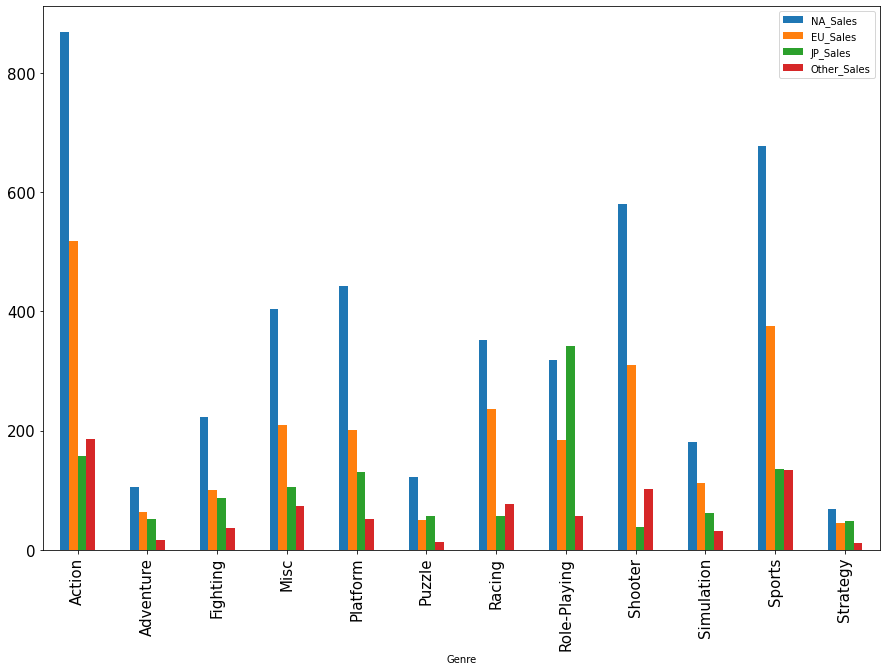

In [13]:
# 지역별 각 장르의 출고량
df_area_genre_visual.plot.bar(figsize=(15,10), fontsize=15)
plt.show()

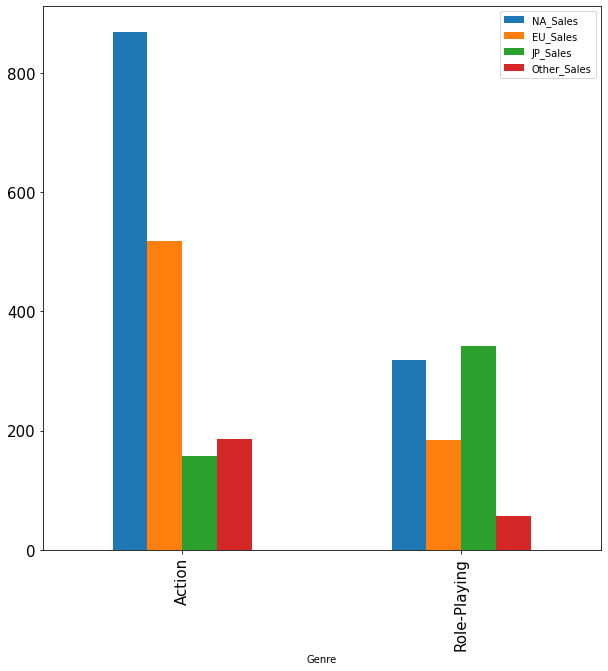

In [14]:
# 지역별 action, role-playing 출고량
df_area_genre_visual.loc[['Action','Role-Playing'],:].plot.bar(figsize=(10,10), fontsize=15)
plt.show()

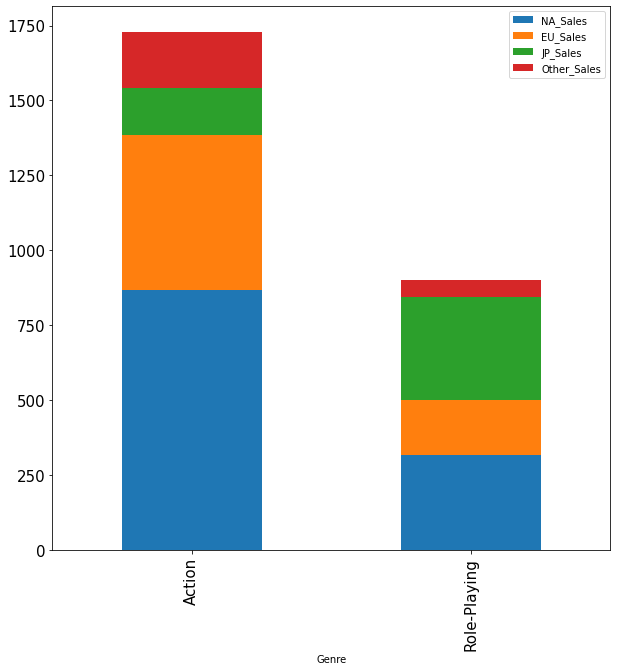

In [15]:
# 지역별 action, role-playing 출고량의 합
df_area_genre_visual.loc[['Action','Role-Playing'],:].plot.bar(figsize=(10,10), fontsize=15, stacked = True)
plt.show()

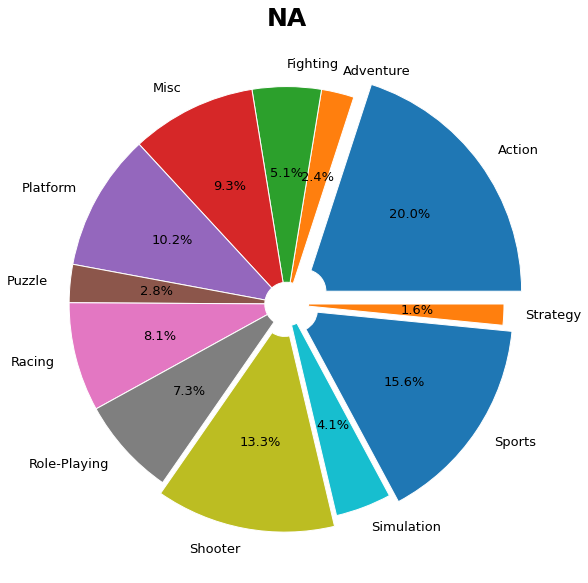

In [16]:
# 북미 지역의 장르 출고량
plt.figure(figsize=(10,10))

explode = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.05, 0.0]
wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 1}
plt.pie(df_area_genre_visual['NA_Sales'],
        labels = df_area_genre_visual.index,
        explode = explode,
        autopct='%1.1f%%',
        textprops = {'fontsize':13},
        wedgeprops=wedgeprops)



plt.title('NA', fontdict={ 'fontsize': 25, 'fontweight': 'bold'})
plt.show()

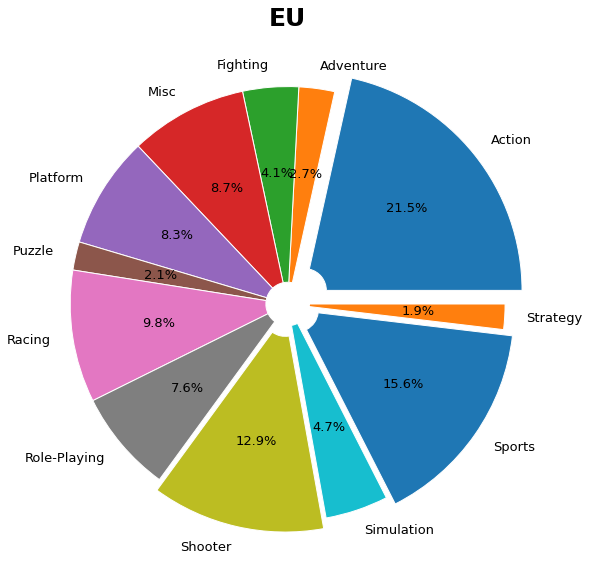

In [17]:
# 유럽 지역의 장르 출고량
plt.figure(figsize=(10,10))
explode = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.05, 0.0]
plt.pie(df_area_genre_visual['EU_Sales'],
        labels = df_area_genre_visual.index,
        explode = explode,
        autopct='%1.1f%%',
        textprops = {'fontsize':13},
        wedgeprops=wedgeprops)

plt.title('EU', fontdict={ 'fontsize': 25, 'fontweight': 'bold'})
plt.show()

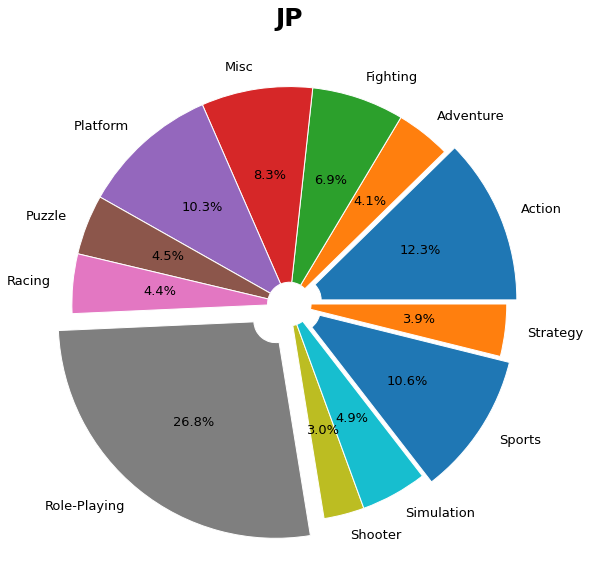

In [18]:
# 일본 지역의 장르 출고량
plt.figure(figsize=(10,10))
explode = [0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.0]
plt.pie(df_area_genre_visual['JP_Sales'],
        labels = df_area_genre_visual.index,
        explode = explode,
        autopct='%1.1f%%',
        textprops = {'fontsize':13},
        wedgeprops=wedgeprops)

plt.title('JP', fontdict={ 'fontsize': 25, 'fontweight': 'bold'})
plt.show()

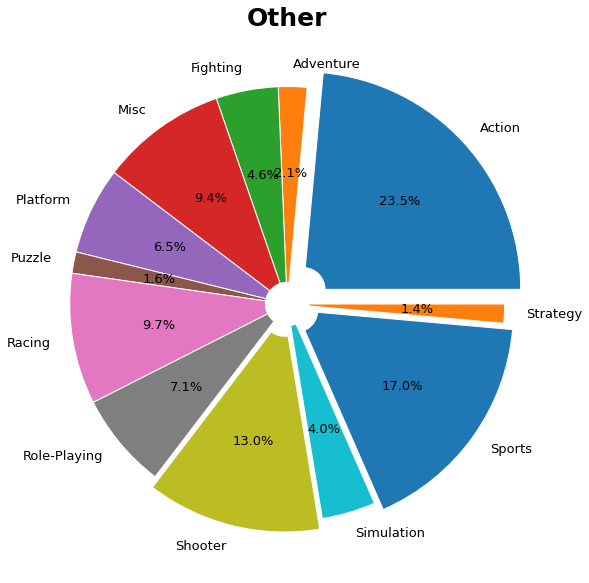

In [19]:
# 그외 지역의 장르 출고량
plt.figure(figsize=(10,10))
explode = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.05, 0.0]
plt.pie(df_area_genre_visual['Other_Sales'],
        labels = df_area_genre_visual.index,
        explode = explode,
        autopct='%1.1f%%',
        textprops = {'fontsize':13},
        wedgeprops=wedgeprops)

plt.title('Other', fontdict={ 'fontsize': 25, 'fontweight': 'bold'})
plt.show()


> 2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.




In [20]:
# 필요한 부분만 가져오기
# 플랫폼 + 연도 + 출고량
df_year_area = df.loc[:,['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].copy()
df_year_area['Total_year_area'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df_year_area = df_year_area.loc[:,['Year','Total_year_area']]
df_year_area.head()

,Year,Total_year_area
0,2008,0.04
1,2009,0.18
2,2010,0.02
3,2010,0.04
4,2010,0.25


In [21]:
# Unknown 인 데이터 제거
condition = df_year_area['Year']=='Unknown'
df_year_area = df_year_area[~condition]
df_year_area.head()

,Year,Total_year_area
0,2008,0.04
1,2009,0.18
2,2010,0.02
3,2010,0.04
4,2010,0.25


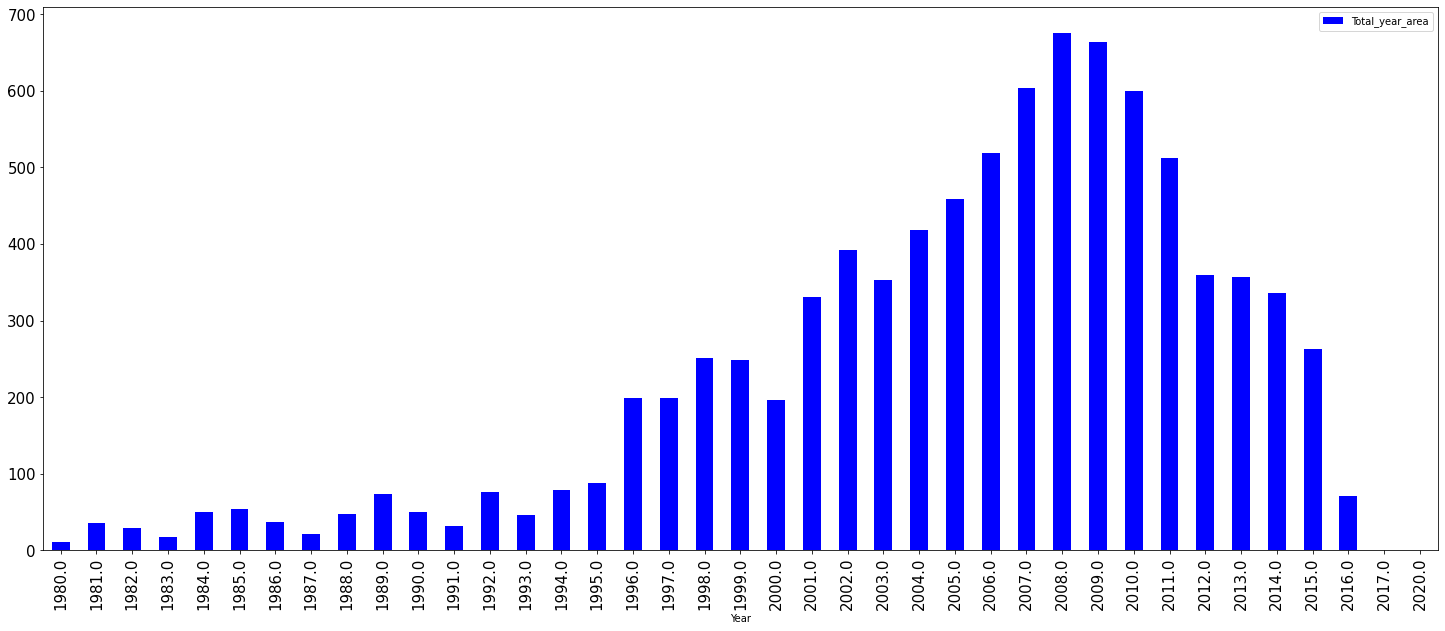

In [22]:
df_year_area_visual = df_year_area.groupby(['Year']).sum()
df_year_area_visual.plot(kind ='bar', figsize=(25,10), fontsize=15, color='b')
plt.show()

In [23]:
# 필요한 부분만 가져오기
# 플랫폼 + 연도 + 장르
df_year_trend = df.copy()
df_year_trend = df_year_trend.loc[:,['Platform','Year', 'Genre']]
# 연도와 장르가 'Unknown' 인 값을 제외한 데이터
condition = (df_year_trend['Year']=='Unknown') | (df_year_trend['Genre']=='Unknown')
df_year_trend = df_year_trend[~condition]
df_year_trend.reset_index(drop=True, inplace=True)
df_year_trend.head()

,Platform,Year,Genre
0,DS,2008,Action
1,Wii,2009,Action
2,PSP,2010,Adventure
3,DS,2010,Misc
4,PS3,2010,Platform


In [24]:
# 먼저 연도와 장르
df_year_genre = df_year_trend.loc[:,['Year','Genre']].copy()
df_year_genre.head()

,Year,Genre
0,2008,Action
1,2009,Action
2,2010,Adventure
3,2010,Misc
4,2010,Platform


In [25]:
# 연도와 장르의 빈도수
df_year_genre_visual = pd.crosstab(df_year_genre['Year'],df_year_genre['Genre'])
df_year_genre_visual.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1,0,1,4,0,0,0,0,2,0,0,0
1981.0,25,0,0,0,3,2,1,0,10,1,4,0
1982.0,18,0,0,1,5,3,2,0,5,0,2,0
1983.0,7,1,0,1,5,1,0,0,1,0,1,0
1984.0,1,0,0,1,1,3,3,0,3,0,2,0


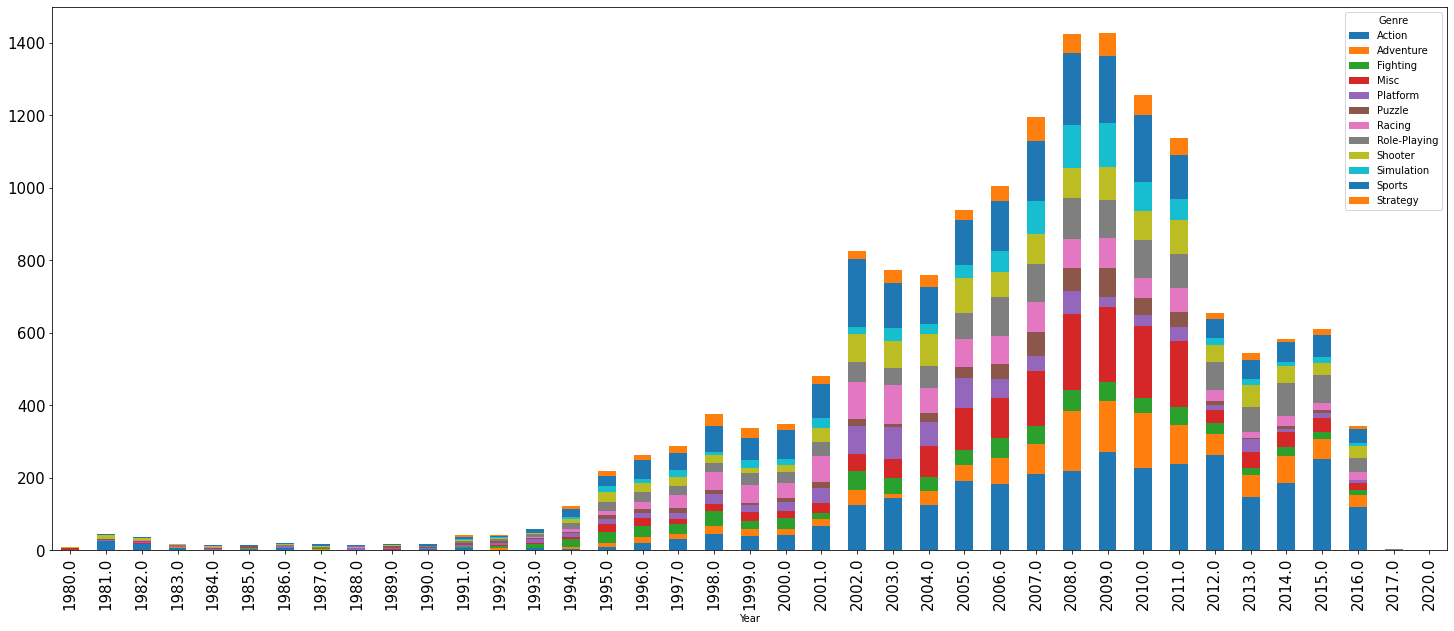

In [26]:
# 연도별 장르의 합 (출시한 게임 수)
df_year_genre_visual.plot(kind ='bar', figsize=(25,10), fontsize=15, stacked = True)
plt.show()

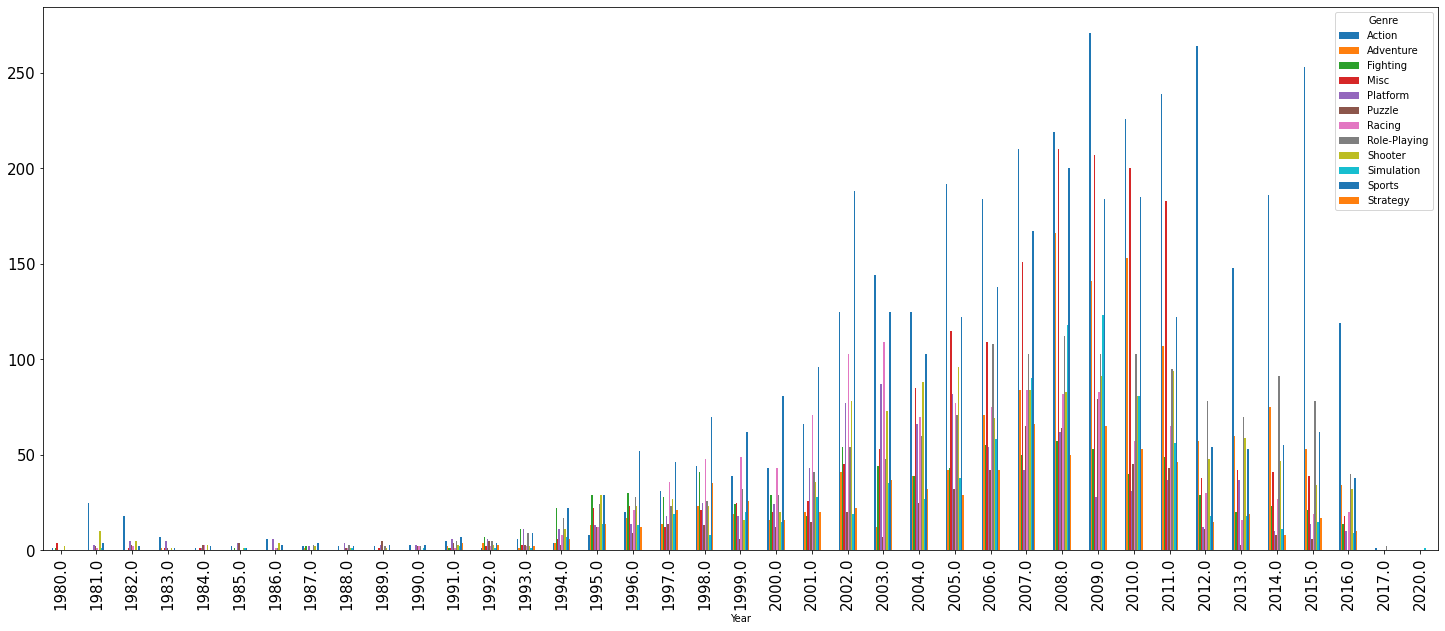

In [27]:
# 연도별 장르
df_year_genre_visual.plot(kind ='bar', figsize=(25,10), fontsize=15)
plt.show()

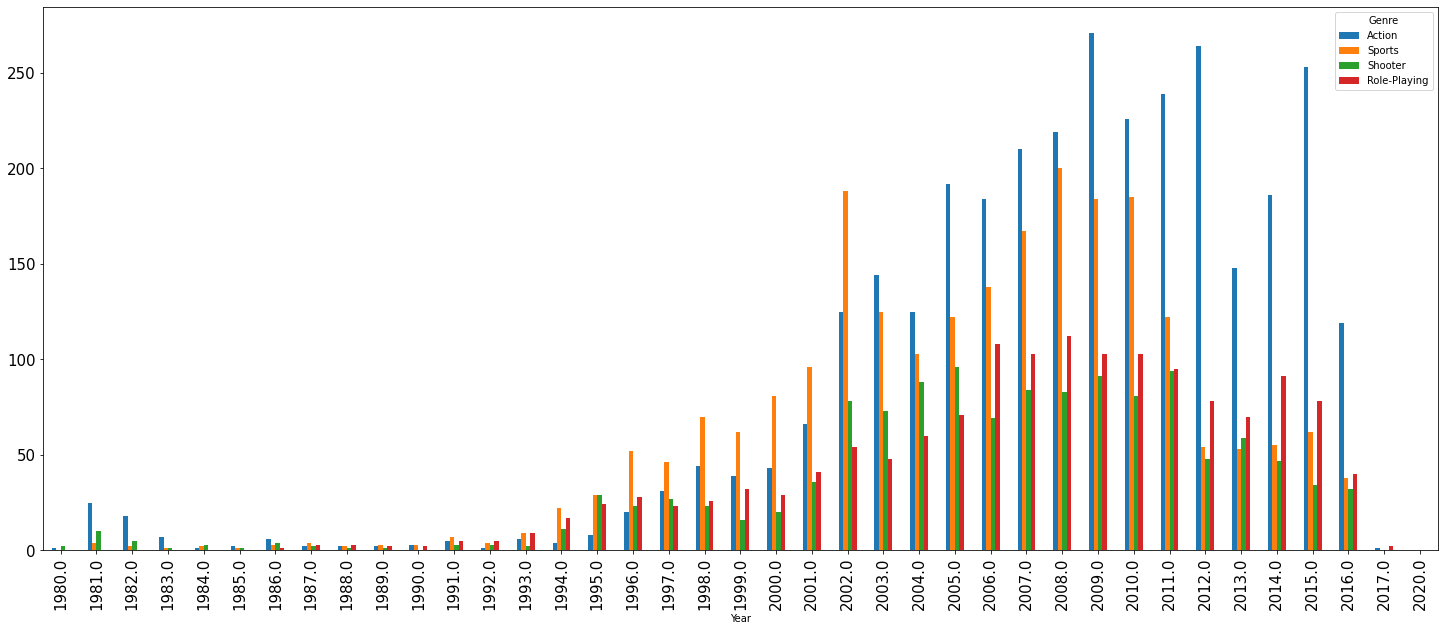

In [28]:
# 연도별 장르 ( 액션, 스포츠, 슈터, 롤플레잉)
df_year_genre_visual.loc[:,['Action','Sports','Shooter','Role-Playing']].plot(kind ='bar', figsize=(25,10), fontsize=15)
plt.show()

In [29]:
# 필요한 데이터만 불러오기
# 플렛폼의 비율
df_name_platform = df.loc[:,['Name','Platform']]
df_name_platform.head()

,Name,Platform
0,Candace Kane's Candy Factory,DS
1,The Munchables,Wii
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP
3,Deal or No Deal: Special Edition,DS
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3


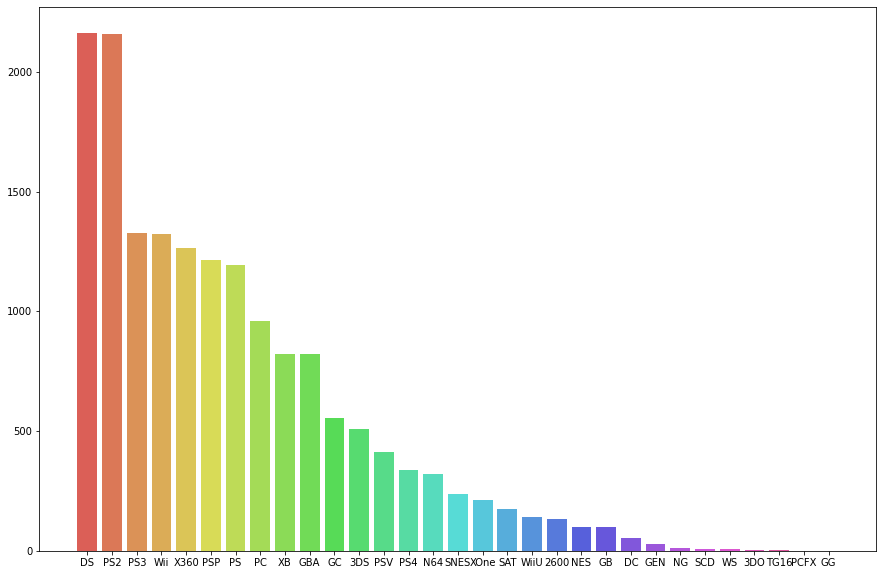

In [30]:
# 게임별 플렛폼 비율
df_name_platform_visual = df_name_platform.groupby(['Platform']).count()
df_name_platform_visual = df_name_platform_visual.sort_values(by='Name' ,ascending=False)

plt.figure(figsize=(15,10))
colors = sns.color_palette('hls',len(df_name_platform_visual['Name']))
plt.bar(df_name_platform_visual.index, df_name_platform_visual['Name'], color = colors)
plt.show()

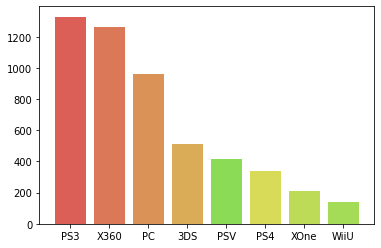

In [31]:
condition = df_name_platform_visual.loc[['PS3','X360','PC','3DS','PSV','PS4','XOne','WiiU','PSV'],:]
plt.bar(condition.index, condition['Name'], color = colors)
plt.show()

In [32]:
# 필요한 데이터만 불러오기
# 년도 별 플랫폼
df_year_platform = df_year_trend.loc[:,['Year','Platform']].copy()
df_year_platform.head()

,Year,Platform
0,2008,DS
1,2009,Wii
2,2010,PSP
3,2010,DS
4,2010,PS3


In [33]:
# 플랫폼 연도의 빈도수
df_year_platform_visual = pd.crosstab(df_year_platform['Platform'],df_year_platform['Year'])
df_year_platform_visual.columns = df_year_platform_visual.columns.astype(int)
df_year_platform_visual.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,8,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,90,79,86,35,0,0
DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,117,202,377,490,405,326,152,25,9,1,0,0,0,1


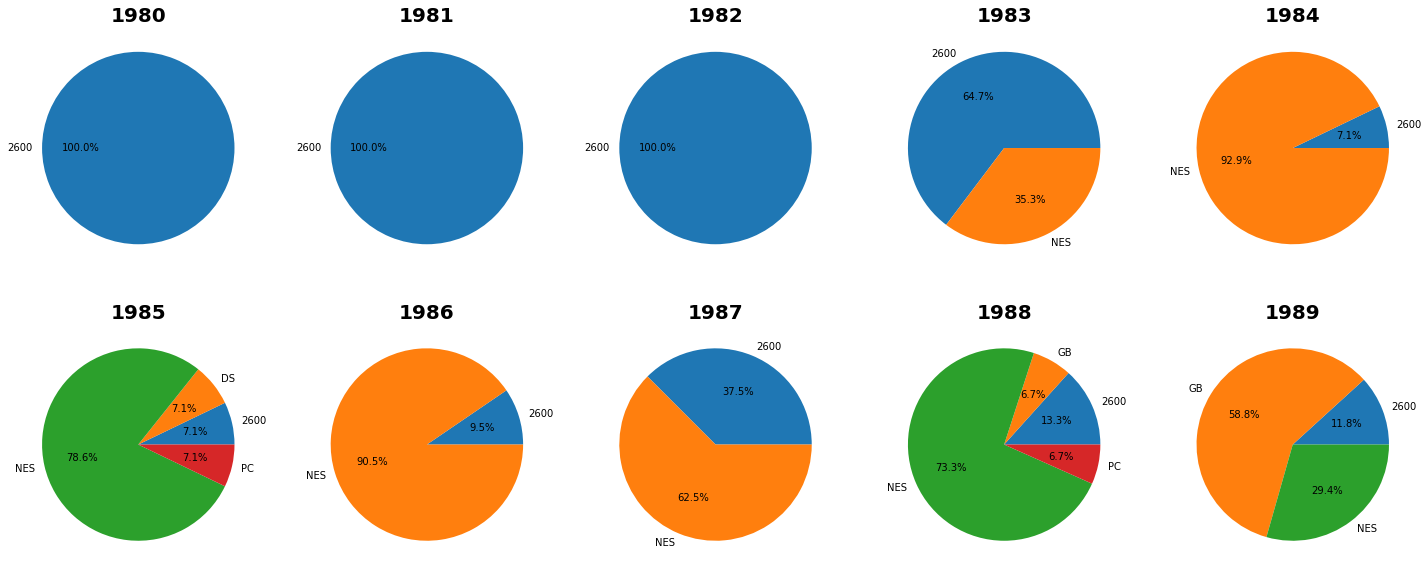

In [34]:
# 시각화 1980~1989
plt.figure(figsize=(25,10))

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'
}

for i in range(0,10):
    plt.subplot(2,5,i+1)
    condition = df_year_platform_visual.iloc[:,i] == 0
    plt.pie(df_year_platform_visual[~condition].iloc[:,i],
            labels = df_year_platform_visual[~condition].iloc[:,0].index,
            autopct='%.1f%%')
    plt.title(df_year_platform_visual.columns[i], fontdict=title_font)

plt.show()

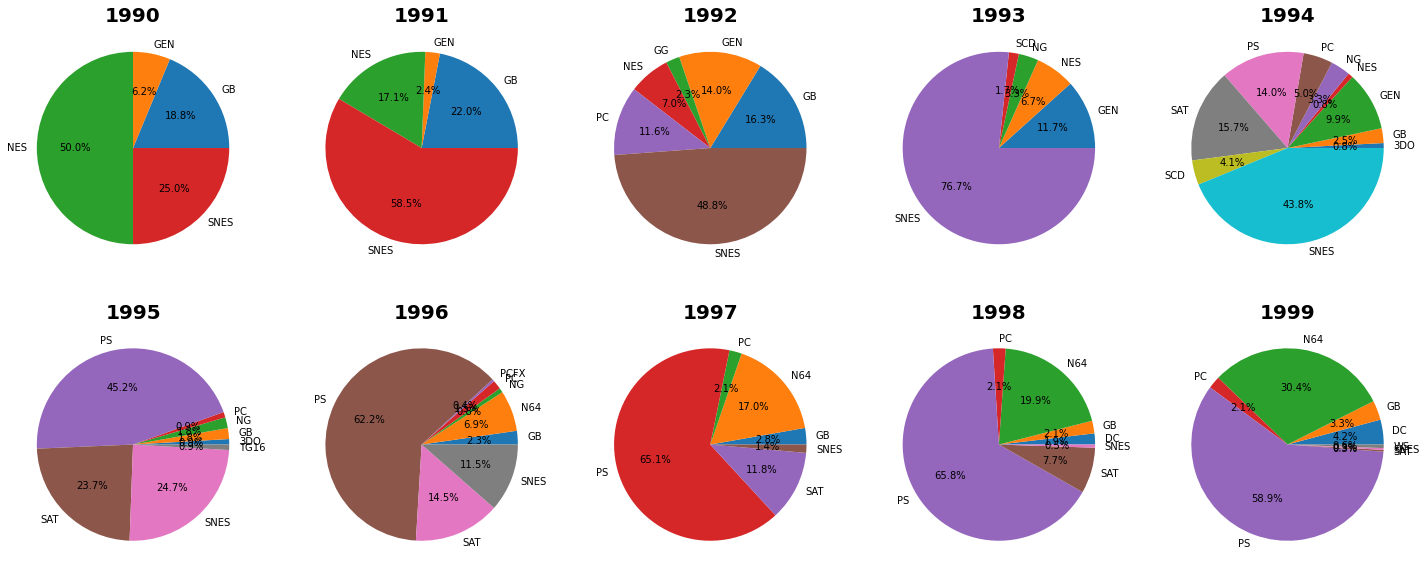

In [35]:
# 시각화 1990~1999
plt.figure(figsize=(25,10))

for i in range(10,20):
    plt.subplot(2,5,i+1-10)
    condition = df_year_platform_visual.iloc[:,i] == 0
    plt.pie(df_year_platform_visual[~condition].iloc[:,i],
            labels = df_year_platform_visual[~condition].iloc[:,0].index,
            autopct='%.1f%%')
    plt.title(df_year_platform_visual.columns[i], fontdict=title_font)

plt.show()

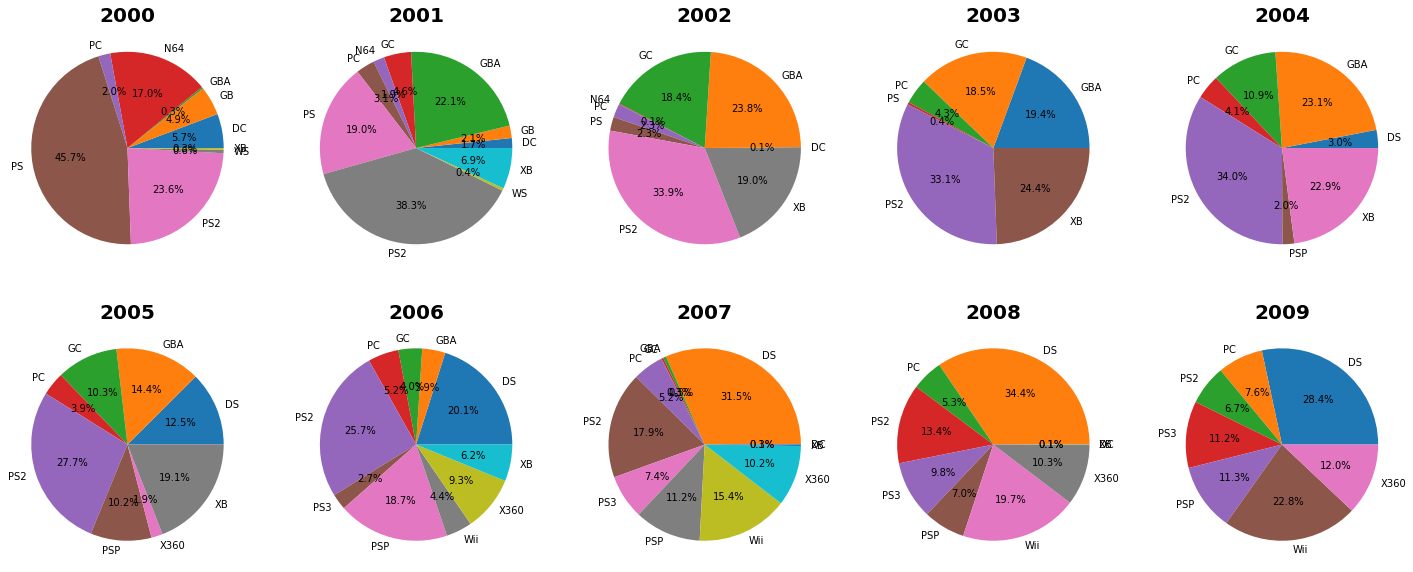

In [36]:
# 시각화 2000 ~ 2009
plt.figure(figsize=(25,10))

for i in range(20,30):
    plt.subplot(2,5,i+1-20)
    condition = df_year_platform_visual.iloc[:,i] == 0
    plt.pie(df_year_platform_visual[~condition].iloc[:,i],
            labels = df_year_platform_visual[~condition].iloc[:,0].index,
            autopct='%.1f%%')
    plt.title(df_year_platform_visual.columns[i], fontdict=title_font)

plt.show()

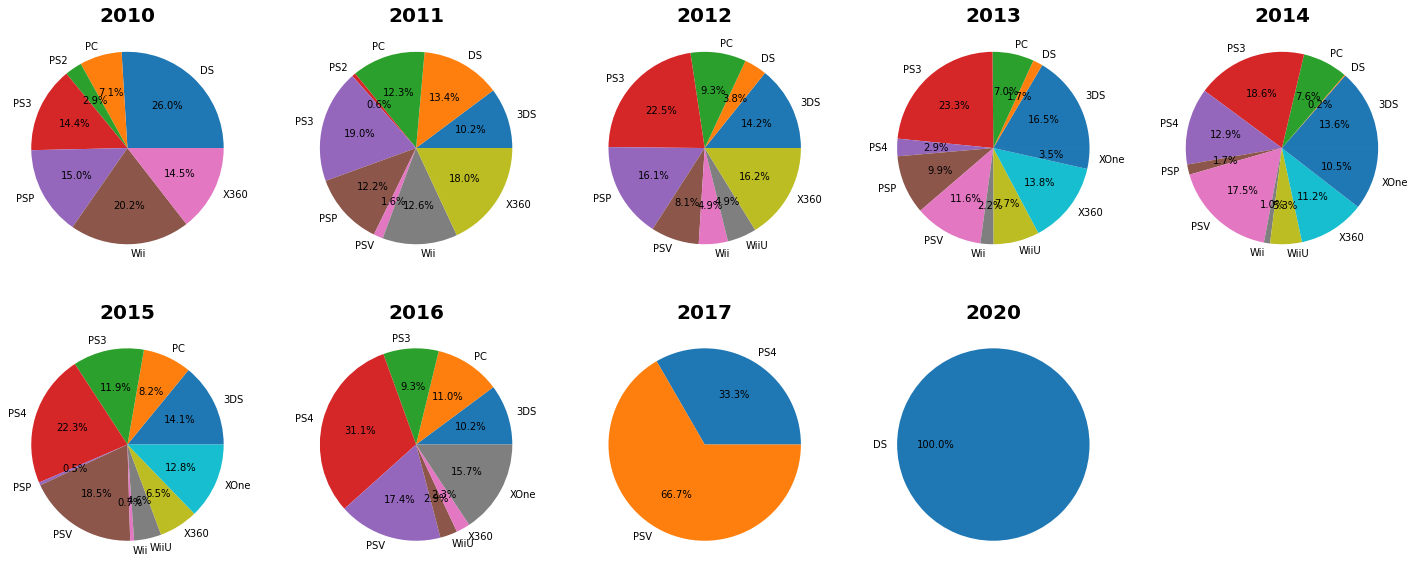

In [37]:
# 2010 ~ 2020 (17 18 19 20 은 데이터가 적어 제외)
plt.figure(figsize=(25,10))

for i in range(30,39):
    plt.subplot(2,5,i+1-30)
    condition = df_year_platform_visual.iloc[:,i] == 0
    plt.pie(df_year_platform_visual[~condition].iloc[:,i],
            labels = df_year_platform_visual[~condition].iloc[:,0].index,
            autopct='%.1f%%')
    plt.title(df_year_platform_visual.columns[i], fontdict=title_font)

plt.show()

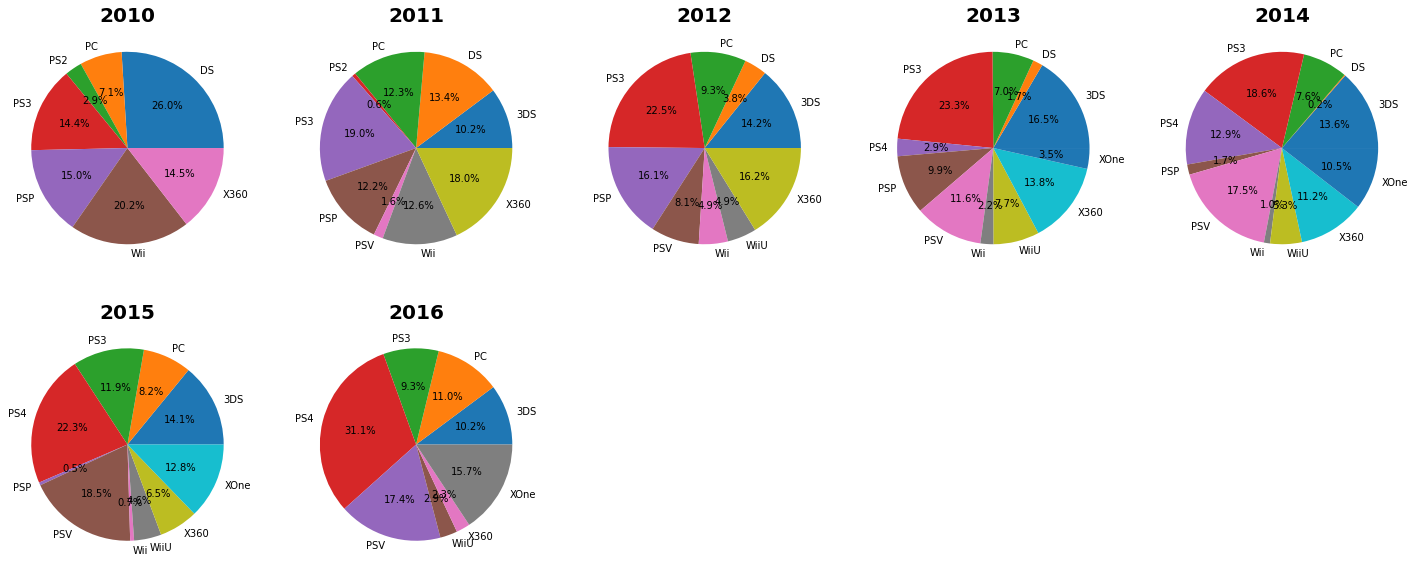

In [38]:
# 2010 ~ 2020 (17 18 19 20 은 데이터가 적어 제외)
plt.figure(figsize=(25,10))

for i in range(30,37):
    plt.subplot(2,5,i+1-30)
    condition = df_year_platform_visual.iloc[:,i] == 0
    plt.pie(df_year_platform_visual[~condition].iloc[:,i],
            labels = df_year_platform_visual[~condition].iloc[:,0].index,
            autopct='%.1f%%')
    plt.title(df_year_platform_visual.columns[i], fontdict=title_font)

plt.show()

In [39]:
# 필요한 것만 빼오기
# 플렛폼과 각 지역의 출고량
df_platform_area = df.loc[:,['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].copy()
df_platform_area.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,0.04,0.00,0.00,0.00
1,Wii,0.17,0.00,0.00,0.01
2,PSP,0.00,0.00,0.02,0.00
3,DS,0.04,0.00,0.00,0.00
4,PS3,0.12,0.09,0.00,0.04


In [40]:
# 출고량의 총합에 대해 플랫폼으로 그룹화
df_platform_area['Platform_Total'] = df_platform_area['NA_Sales'] + df_platform_area['EU_Sales'] + df_platform_area['JP_Sales'] + df_platform_area['Other_Sales']
df_platform_area_visual = df_platform_area.loc[:,['Platform','Platform_Total']].groupby(['Platform']).sum()
df_platform_area_visual = df_platform_area_visual.sort_values(by='Platform_Total' ,ascending=False)
df_platform_area_visual.head()

,Platform_Total
Platform,
PS2,1251.352398
X360,972.602331
PS3,949.610321
Wii,923.462211
DS,817.752631


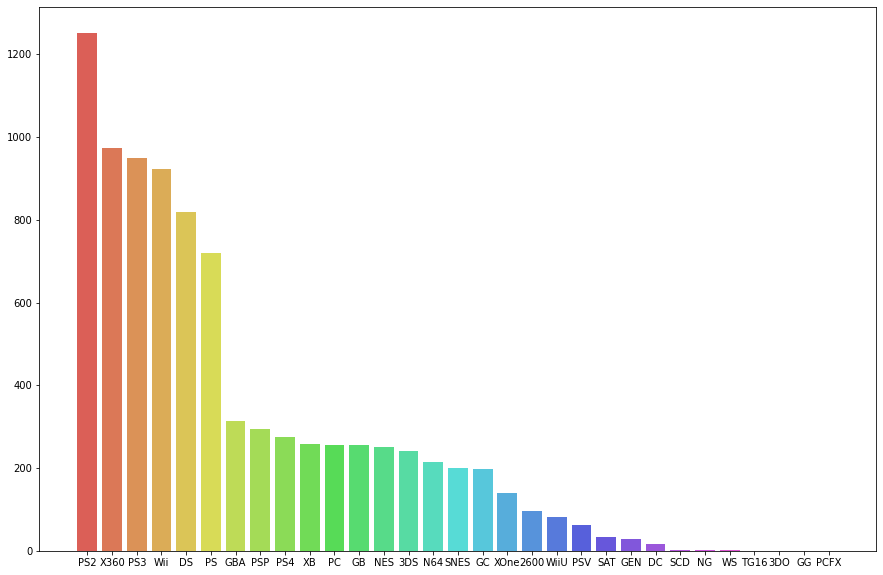

In [41]:
# 각 플랫폼의 출고량
plt.figure(figsize=(15,10))
colors = sns.color_palette('hls',len(df_platform_area_visual['Platform_Total']))
plt.bar(df_platform_area_visual.index, df_platform_area_visual['Platform_Total'], color = colors)
plt.show()

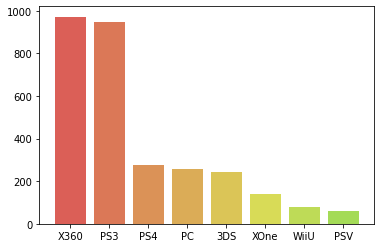

In [42]:
# 2016년 기준 출시된 플랫폼 게임의 출고량
condition = df_platform_area_visual.loc[['X360','PS3','PS4','PC','3DS','XOne','WiiU','PSV'],:]
plt.bar(condition.index, condition['Platform_Total'], color = colors)
plt.show()

In [43]:
# 필요한 데이터만 가져오기
# 일정 연도 이후 플랫폼별 출고량과 출시량
df_name_year_platform_area = df.loc[:,['Name','Platform','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales'] ]
df_name_year_platform_area['Total_nypa'] = (df_name_year_platform_area['NA_Sales'] +
                                            df_name_year_platform_area['EU_Sales'] +
                                            df_name_year_platform_area['JP_Sales'] +
                                            df_name_year_platform_area['Other_Sales'])

# 출고량 총합만 필요
df_name_year_platform_area = df_name_year_platform_area.iloc[:,[0,1,2,7]]
# Unknown 제거
condition = df_name_year_platform_area['Year'] == 'Unknown'
df_name_year_platform_area = df_name_year_platform_area[~condition]
# 2013년 이후의 데이터만 사용, PS4가 2013년에 출시
condition = df_name_year_platform_area['Year'] >= 2013
df_name_year_platform_area = df_name_year_platform_area[condition]
df_name_year_platform_area.head()

,Name,Platform,Year,Total_nypa
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,0.03
18,Grand Kingdom,PS4,2015,0.05
23,Don Bradman Cricket 14,X360,2014,0.01
24,Injustice: Gods Among Us,PS3,2013,1.25
33,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,0.01


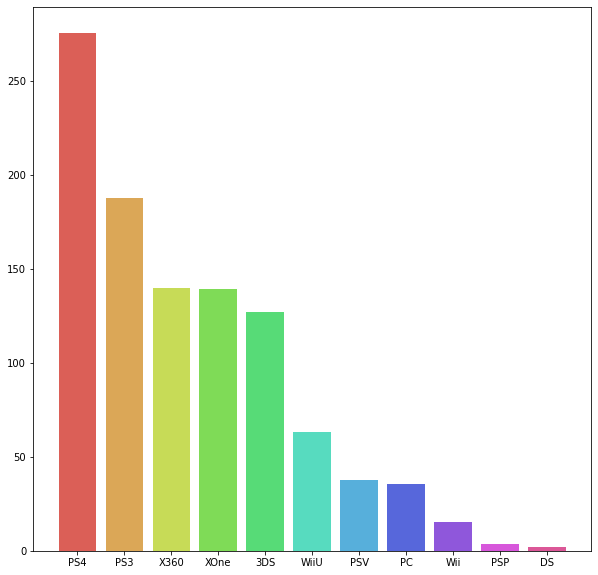

In [44]:
df_2013_platform_area_visual = df_name_year_platform_area.loc[:,['Platform','Total_nypa']].groupby(['Platform']).sum()
df_2013_platform_area_visual = df_2013_platform_area_visual.sort_values(by='Total_nypa' ,ascending=False)

# 2013년 이후 각 플랫폼의 출고량
plt.figure(figsize=(10,10))
colors = sns.color_palette('hls',len(df_2013_platform_area_visual['Total_nypa']))
plt.bar(df_2013_platform_area_visual.index, df_2013_platform_area_visual['Total_nypa'], color = colors)
plt.show()

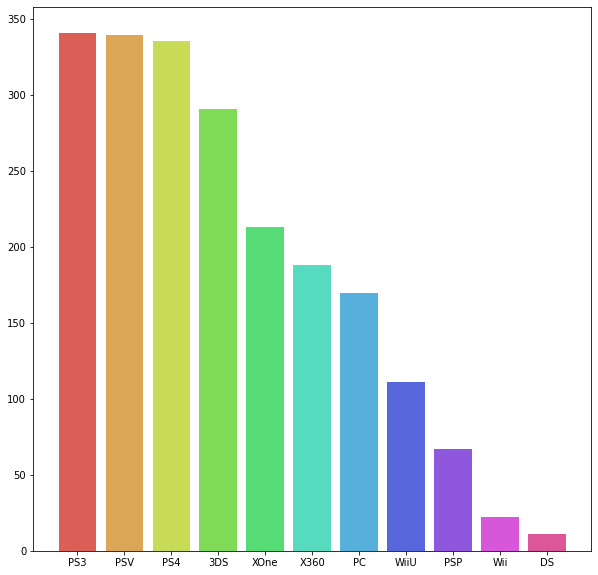

In [45]:
df_2013_name_platform_visual = df_name_year_platform_area.loc[:,['Name','Platform']].groupby(['Platform']).count()
df_2013_name_platform_visual = df_2013_name_platform_visual.sort_values(by='Name' ,ascending=False)

# 2013년 이후 각 플랫폼의 출시량
plt.figure(figsize=(10,10))
colors = sns.color_palette('hls',len(df_2013_name_platform_visual['Name']))
plt.bar(df_2013_name_platform_visual.index, df_2013_name_platform_visual['Name'], color = colors)
plt.show()



> 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함



In [46]:
# 출고량(각 지역별 출고량의 합) + 게임 일름
# 필요한 것만 가져오기
df_name_area = df.loc[:,['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].copy()
df_name_area['Name_Total'] =  df_name_area['NA_Sales'] + df_name_area['EU_Sales'] + df_name_area['JP_Sales'] + df_name_area['Other_Sales']
df_name_area.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Name_Total
0,Candace Kane's Candy Factory,0.04,0.00,0.00,0.00,0.04
1,The Munchables,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,0.12,0.09,0.00,0.04,0.25


In [47]:
# 각 게임별 출고량, 다른 플렛폼일 경우 합쳐서 계산
df_name_area_visual = df_name_area.loc[:,['Name','Name_Total']].groupby(['Name']).sum()
df_name_area_visual = df_name_area_visual.sort_values(by='Name_Total' ,ascending=False)
df_name_area_visual.head()

,Name_Total
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.83


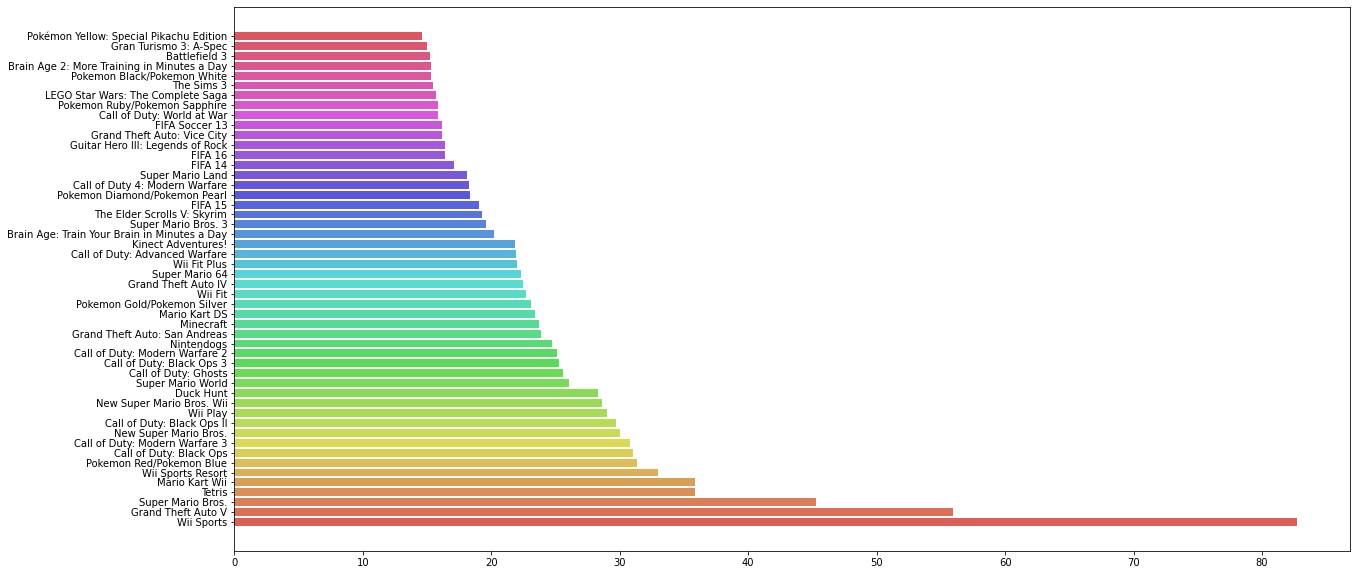

In [48]:
# 각 게임별 출고량 시각화 (약 11000개의 데이터가 있어서 상위 100개)
condition = df_name_area_visual.iloc[0:50,:]
plt.figure(figsize=(20,10))
colors = sns.color_palette('hls',len(condition['Name_Total']))
plt.barh(condition.index, condition['Name_Total'], color = colors)
plt.show()

In [49]:
# 출고량(각 지역별 출고량의 합) + 게임 + 장르
# 필요한 것만 가져오기
df_name_genre_area = df.loc[:,['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].copy()
df_name_genre_area['Name_Total'] =  (df_name_genre_area['NA_Sales'] +
                                     df_name_genre_area['EU_Sales'] +
                                     df_name_genre_area['JP_Sales'] +
                                     df_name_genre_area['Other_Sales'])
df_name_genre_area.head()

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Name_Total
0,Candace Kane's Candy Factory,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,Platform,0.12,0.09,0.00,0.04,0.25


In [50]:
# 가장 많은 출고량의 데이터 50개를 추출
df_name_genre_area_to_extract = df_name_genre_area.loc[:,['Name','Genre','Name_Total']]
df_name_genre_area_to_extract = df_name_genre_area_to_extract.groupby(['Name','Genre']).sum()
df_name_genre_area_to_extract = df_name_genre_area_to_extract.sort_values(by='Name_Total' ,ascending=False)
df_name_genre_area_visual = df_name_genre_area_to_extract.iloc[0:50,:]
df_name_genre_area_visual.head()

,,Name_Total
Name,Genre,
Wii Sports,Sports,82.74
Grand Theft Auto V,Action,55.92
Super Mario Bros.,Platform,45.31
Tetris,Puzzle,35.84
Mario Kart Wii,Racing,35.83


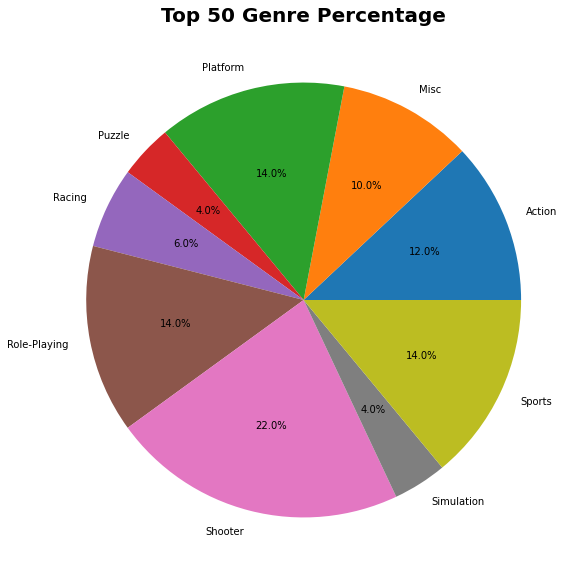

In [51]:
# 출고량이 제일 높은 50개를 기준으로 장르의 퍼센테이지 계산
df_name_genre_area_visual = df_name_genre_area_visual.reset_index()
df_name_genre_area_visual = df_name_genre_area_visual.drop('Name',axis=1)
df_name_genre_area_visual = df_name_genre_area_visual.groupby(['Genre']).count()

plt.figure(figsize=(25,10))
# np.array(values).ravel()
plt.pie(df_name_genre_area_visual['Name_Total'],
        labels = df_name_genre_area_visual.index,
        autopct='%.1f%%')
plt.title('Top 50 Genre Percentage', fontdict=title_font)
plt.show()

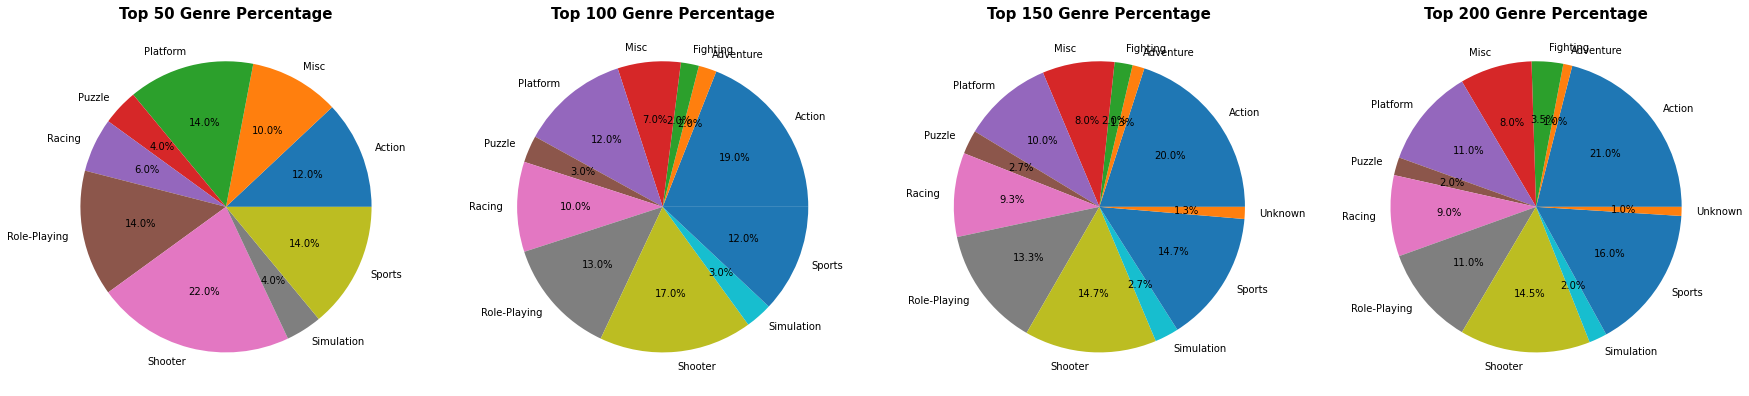

In [57]:
# 출고량이 높은 50, 100, 150, 200개의 장르 퍼센트
plt.figure(figsize=(30,15))

title_font = {
    'fontsize': 15,
    'fontweight': 'bold'
}

for i in range(1,5):
    df_name_genre_area_visual = df_name_genre_area_to_extract.iloc[0:50*i,:]
    df_name_genre_area_visual = df_name_genre_area_visual.reset_index()
    df_name_genre_area_visual = df_name_genre_area_visual.drop('Name',axis=1)
    df_name_genre_area_visual = df_name_genre_area_visual.groupby(['Genre']).count()

    plt.subplot(1,4,i)
    condition = df_year_platform_visual.iloc[:,i] == 0
    plt.pie(df_name_genre_area_visual['Name_Total'],
            labels = df_name_genre_area_visual.index,
            autopct='%.1f%%')
    plt.title( ('Top '+str(50*i)+' Genre Percentage') , fontdict=title_font)
plt.show()